In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [25]:
# Check for missing values and data types
customers.head()
# customers.info()


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [26]:
# Convert SignupDate to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')

# Check the data types again
customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB


In [27]:
products.head()


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [28]:
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [29]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [30]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB
None


In [45]:
# find number of duplicate values in the .csv file
print("Duplicate values in customers.csv = ",customers.duplicated().sum())
print("Duplicate values in products.csv = ",products.duplicated().sum())
print("Duplicate values in transcations.csv = ",transactions.duplicated().sum())

Duplicate values in customers.csv =  0
Duplicate values in products.csv =  0
Duplicate values in transcations.csv =  0


In [46]:
# Descriptive statistics
print("On customers.csv")
print(customers.describe(),"\n")

print(products.describe())
print("On products.csv \n")
print(transactions.describe())

# Descriptive statistics apply only on numerical value

On customers.csv
                SignupDate
count                  200
mean   2023-07-19 08:31:12
min    2022-01-22 00:00:00
25%    2022-09-26 12:00:00
50%    2023-08-31 12:00:00
75%    2024-04-12 12:00:00
max    2024-12-28 00:00:00 

            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
On products.csv 

                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.0400

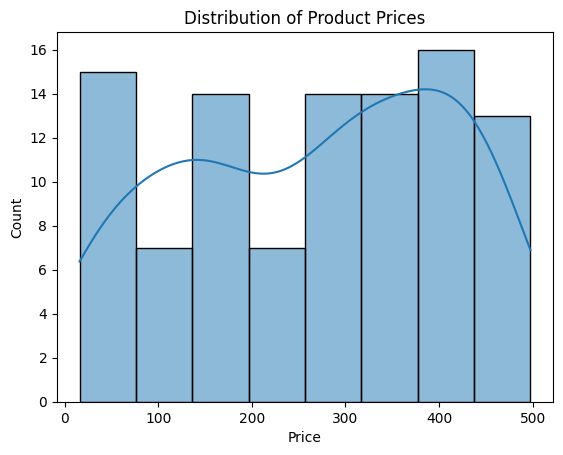

In [48]:
# Data visualization
# Distribution of product prices
sns.histplot(products['Price'], kde=True)
plt.title('Distribution of Product Prices')
plt.show()


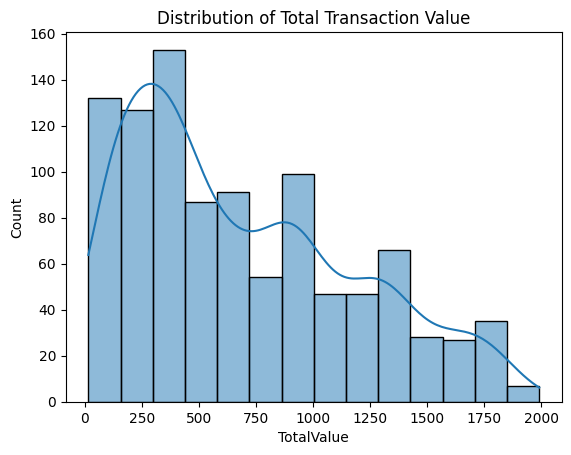

In [49]:
# Distribution of total transaction value
sns.histplot(transactions['TotalValue'], kde=True)
plt.title('Distribution of Total Transaction Value')
plt.show()

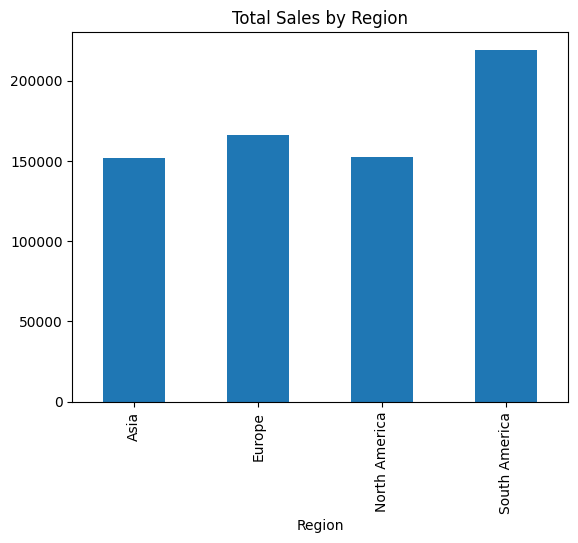

In [50]:
# Transactions per region
region_transactions = transactions.merge(customers, on='CustomerID')
region_sales = region_transactions.groupby('Region')['TotalValue'].sum()
region_sales.plot(kind='bar', title='Total Sales by Region')
plt.show()

In [54]:
# Convert top_products to a DataFrame
top_products_df = top_products.reset_index()

# Now, merge the DataFrame with 'products' to get product names
top_products_with_names = top_products_df.merge(products[['ProductID', 'ProductName',]], on='ProductID')
print(top_products_with_names)


  ProductID  TotalValue               ProductName
0      P029    19513.80        TechPro Headphones
1      P079    17946.91            ActiveWear Rug
2      P048    17905.20          TechPro Cookbook
3      P020    15060.92         ActiveWear Jacket
4      P062    14592.24           HomeSense Novel
5      P059    13947.20           SoundWave Jeans
6      P039    13778.88        TechPro Smartwatch
7      P083    13671.60     ActiveWear Smartwatch
8      P019    13487.95     ComfortLiving Sweater
9      P041    13232.12  ComfortLiving Smartphone


count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_6676\3324418972.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


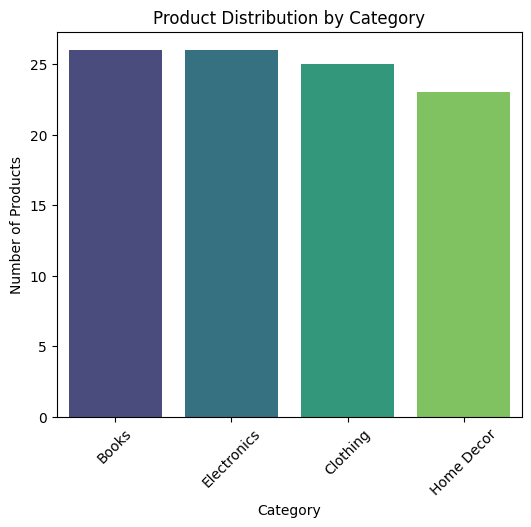

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers_df = pd.read_csv("Customers.csv")
products_df = pd.read_csv("Products.csv")

# Convert SignupDate to datetime format
customers_df["SignupDate"] = pd.to_datetime(customers_df["SignupDate"])

# Count customers by region
region_counts = customers_df["Region"].value_counts()

# Summary statistics of product prices
print(products_df["Price"].describe())

# Count products by category
category_counts = products_df["Category"].value_counts()

# Plot product distribution by category
plt.figure(figsize=(6, ))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.title("Product Distribution by Category")
plt.xticks(rotation=45)
plt.show()
